In [1]:
library(rstan)
library(brms)
library(here)
library(bayesplot)
library(ggfortify)
library(gridExtra)

# 計算の高速化
rstan_options(auto_write = TRUE)
options(mc.cores = parallel::detectCores())

source(here("plotSSM.r"), encoding = "utf-8")


要求されたパッケージ StanHeaders をロード中です


rstan version 2.32.6 (Stan version 2.32.2)


For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
For within-chain threading using `reduce_sum()` or `map_rect()` Stan functions,
change `threads_per_chain` option:
rstan_options(threads_per_chain = 1)


要求されたパッケージ Rcpp をロード中です

Loading 'brms' package (version 2.21.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


次のパッケージを付け加えます: ‘brms’


以下のオブジェクトは ‘package:rstan’ からマスクされています:

    loo


以下のオブジェクトは ‘package:stats’ からマスクされています:

    ar


here() starts at /media/e595/Game/プロジェクト置き場/RとStanで始めるベイズ統計モデリング

This is bayesplot version 1.11.1

- Online documentation and vignettes at mc-stan.org/bayesplot

- bayesplot theme set to bayesplot:

In [2]:
sales_df_3 <- read.csv(here("data", "5-5-1-sales-ts-3.csv"))
sales_df_3$date <- as.POSIXct(sales_df_3$date)
head(sales_df_3, n = 3)


,date,sales
,<dttm>,<dbl>
1,2010-01-01,93.5
2,2010-01-02,81.9
3,2010-01-03,91.0


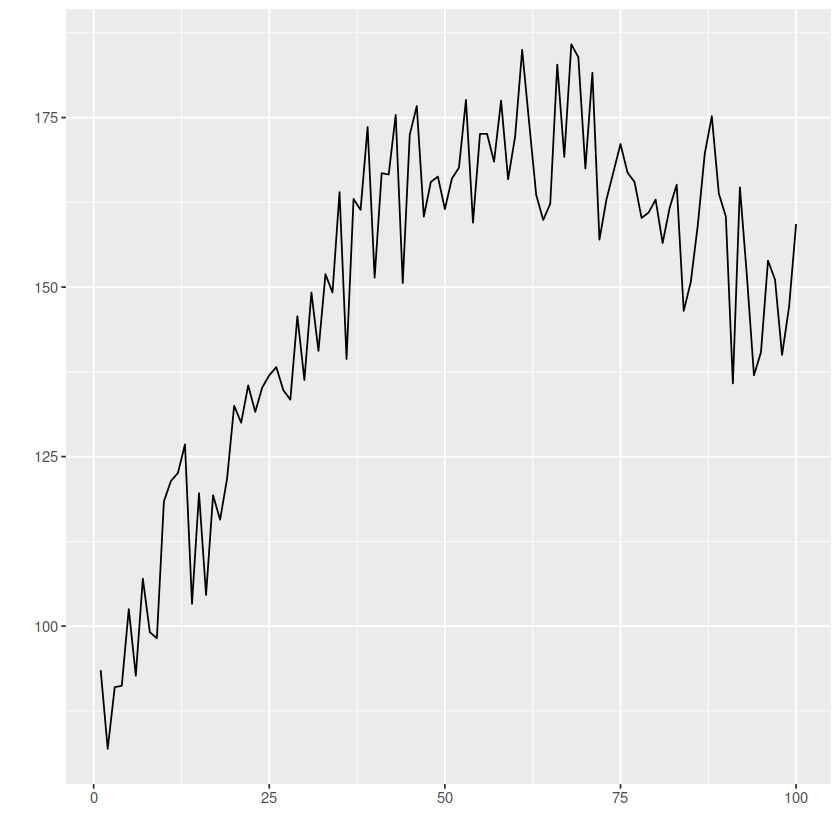

In [3]:
autoplot(ts(sales_df_3[, -1]))


In [4]:
data_list <- list(
  y = sales_df_3$sales,
  T = nrow(sales_df_3)
)

local_level <- stan(
  file = here("5部", "5-2.1-local-level.stan"),
  data = data_list,
  seed = 1
)


In [5]:
print(
  local_level,
  par = c("s_w", "s_v", "lp__"),
  probs = c(0.025, 0.5, 0.975)
)


Inference for Stan model: anon_model.
4 chains, each with iter=2000; warmup=1000; thin=1; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean    sd    2.5%     50%   97.5% n_eff Rhat
s_w     4.25    0.03  0.81    2.92    4.17    6.06   557 1.01
s_v     7.58    0.01  0.72    6.22    7.56    9.08  2382 1.00
lp__ -438.54    0.70 14.82 -467.67 -438.80 -410.18   444 1.01

Samples were drawn using NUTS(diag_e) at Thu Sep  5 19:12:29 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [6]:
smooth_trend <- stan(
  file = here("5部", "5-5-1-smooth-trend.stan"),
  data = data_list,
  seed = 1,
  iter = 8000,
  warmup = 2000,
  thin = 6,
  control = list(adapt_delta = 0.9, max_treedepth = 15)
)


Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”


In [9]:
print(
  smooth_trend,
  par = c("s_z", "s_v", "lp__"),
  probs = c(0.025, 0.5, 0.975)
)


Inference for Stan model: anon_model.
4 chains, each with iter=8000; warmup=2000; thin=6; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean    sd    2.5%     50%   97.5% n_eff Rhat
s_z     0.26    0.00  0.11    0.12    0.24    0.52   505 1.01
s_v     8.43    0.01  0.62    7.31    8.39    9.77  3628 1.00
lp__ -170.85    1.56 35.44 -244.10 -169.06 -108.06   513 1.01

Samples were drawn using NUTS(diag_e) at Thu Sep  5 19:50:17 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [10]:
local_linear_trend <- stan(
  file = here("5部", "5-5-2-local-liner-trend.stan"),
  data = data_list,
  seed = 1,
  iter = 8000,
  warmup = 2000,
  thin = 6
)


Warning message:
“There were 4 chains where the estimated Bayesian Fraction of Missing Information was low. See
https://mc-stan.org/misc/warnings.html#bfmi-low”
Warning message:
“Examine the pairs() plot to diagnose sampling problems
”
Warning message:
“Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess”
Warning message:
“Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess”


In [14]:
print(
  local_linear_trend,
  par = c("s_w", "s_z", "s_v", "lp__"),
  probs = c(0.025, 0.5, 0.975)
)


Inference for Stan model: anon_model.
4 chains, each with iter=8000; warmup=2000; thin=6; 
post-warmup draws per chain=1000, total post-warmup draws=4000.

        mean se_mean    sd    2.5%     50%  97.5% n_eff Rhat
s_w     1.43    0.06  0.91    0.28    1.22   3.56   215 1.01
s_z     0.28    0.01  0.13    0.11    0.25   0.62   391 1.00
s_v     8.27    0.01  0.67    7.02    8.24   9.68  2194 1.00
lp__ -237.13    5.63 77.58 -386.03 -238.93 -84.48   190 1.01

Samples were drawn using NUTS(diag_e) at Thu Sep  5 20:28:10 2024.
For each parameter, n_eff is a crude measure of effective sample size,
and Rhat is the potential scale reduction factor on split chains (at 
convergence, Rhat=1).


In [17]:
mcmc_sample_ll <- rstan::extract(local_level)
mcmc_sample_st <- rstan::extract(smooth_trend)
mcmc_sample_llt <- rstan::extract(local_linear_trend)


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


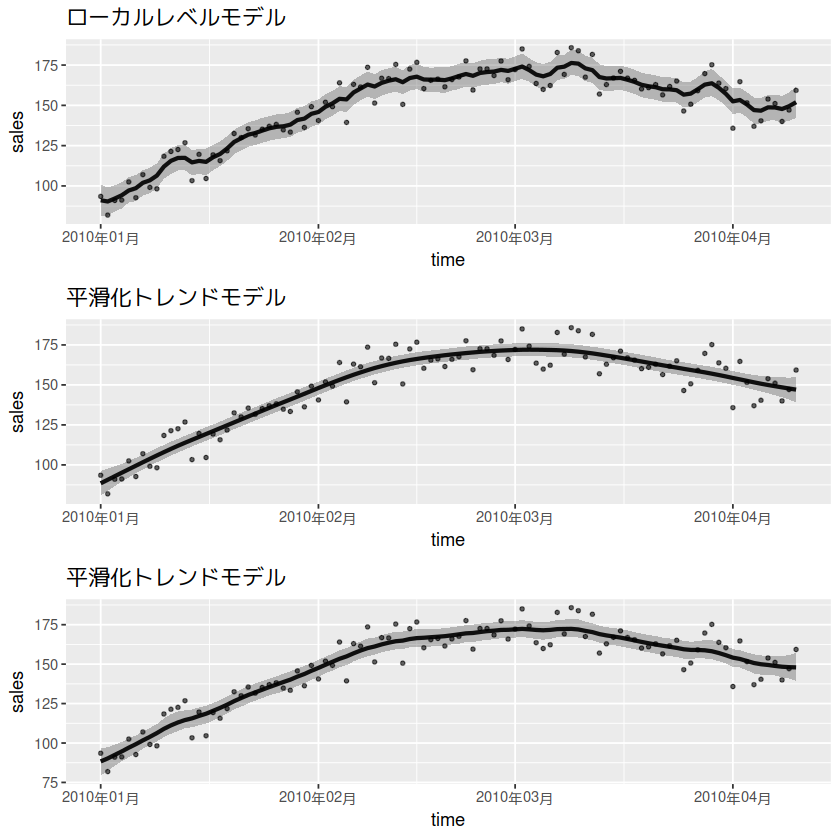

In [18]:
p_ll <- plotSSM(
  mcmc_sample = mcmc_sample_ll,
  time = sales_df_3$date,
  obs_vec = sales_df_3$sales,
  state_name = "mu",
  graph_title = "ローカルレベルモデル",
  y_label = "sales"
)

p_st <- plotSSM(
  mcmc_sample = mcmc_sample_st,
  time = sales_df_3$date,
  obs_vec = sales_df_3$sales,
  state_name = "mu",
  graph_title = "平滑化トレンドモデル",
  y_label = "sales"
)

p_llt <- plotSSM(
  mcmc_sample = mcmc_sample_llt,
  time = sales_df_3$date,
  obs_vec = sales_df_3$sales,
  state_name = "mu",
  graph_title = "平滑化トレンドモデル",
  y_label = "sales"
)

grid.arrange(p_ll, p_st, p_llt)

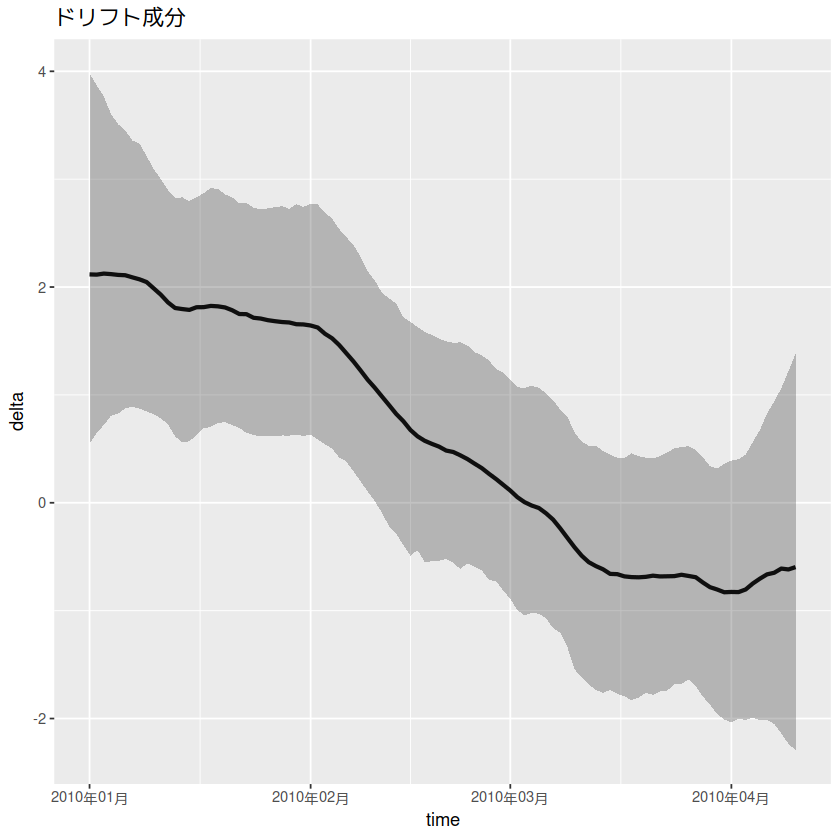

In [19]:
plotSSM(
  mcmc_sample = mcmc_sample_llt,
  time = sales_df_3$date,
  state_name = "delta",
  graph_title = "ドリフト成分",
  y_label = "delta"
)
